In [ ]:
import tensorflow as tf
import pandas as pd

df=pd.read_csv('data/drug200.csv', sep=",")
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
import pickle

o_en=OrdinalEncoder(categories=[["LOW","NORMAL","HIGH"]])
# x=[['HIGH',2],['NORMAL',1],['LOW',1]]
# o_en=o_en.fit(x)
df['BP']=o_en.fit_transform(df[['BP']])

with open("Ordinal_encode.pkl","wb") as f:
    pickle.dump(o_en,f)

: 

In [73]:
df['Cholesterol'].value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

In [74]:
df['Cholesterol']=o_en.fit_transform(df[['Cholesterol']])

In [75]:
from sklearn.preprocessing import OneHotEncoder
on_encode=OrdinalEncoder()
df['Sex']=on_encode.fit_transform(df[['Sex']])

In [76]:
from sklearn.preprocessing import LabelEncoder
l_encode=LabelEncoder()
df['Drug']=l_encode.fit_transform(df[['Drug']])

/home/nileshdalagade/newenv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [77]:
import pickle
with open("Ordinal_encode.pkl","wb") as f:
    pickle.dump(o_en,f)

with open("onehot_encode.pkl","wb") as f:
    pickle.dump(on_encode,f)

with open("label_encode.pkl","wb") as f:
    pickle.dump(l_encode,f)

In [78]:
with open("Ordinal_encode.pkl","rb") as f:
    o_en=pickle.load(f)



In [79]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0.0,2.0,2.0,25.355,0
1,47,1.0,0.0,2.0,13.093,3
2,47,1.0,0.0,2.0,10.114,3
3,28,0.0,1.0,2.0,7.798,4
4,61,0.0,0.0,2.0,18.043,0
...,...,...,...,...,...,...
195,56,0.0,0.0,2.0,11.567,3
196,16,1.0,0.0,2.0,12.006,3
197,52,1.0,1.0,2.0,9.894,4
198,23,1.0,1.0,1.0,14.020,4


In [80]:
df['Drug'].value_counts()

0    91
4    54
1    23
3    16
2    16
Name: Drug, dtype: int64

In [17]:
df.corr()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
Age,1.000000,0.102027,-0.120918,0.068234,-0.063119,0.041856
Sex,0.102027,1.000000,-0.044952,0.008811,-0.125008,0.018239
BP,-0.120918,-0.044952,1.000000,-0.032208,0.036871,-0.299111
Cholesterol,0.068234,0.008811,-0.032208,1.000000,-0.010000,-0.048415
Na_to_K,-0.063119,-0.125008,0.036871,-0.010000,1.000000,-0.689051
Drug,0.041856,0.018239,-0.299111,-0.048415,-0.689051,1.000000


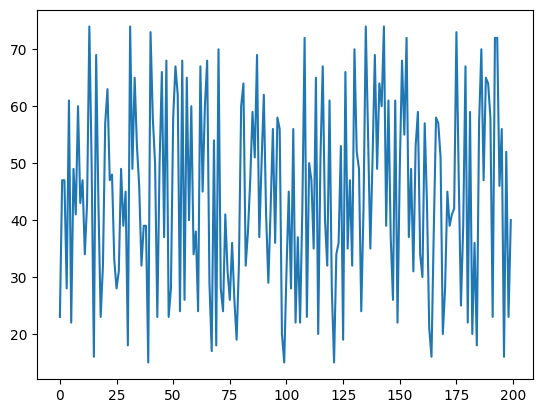

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.plot(df['Age'],)
plt.show()

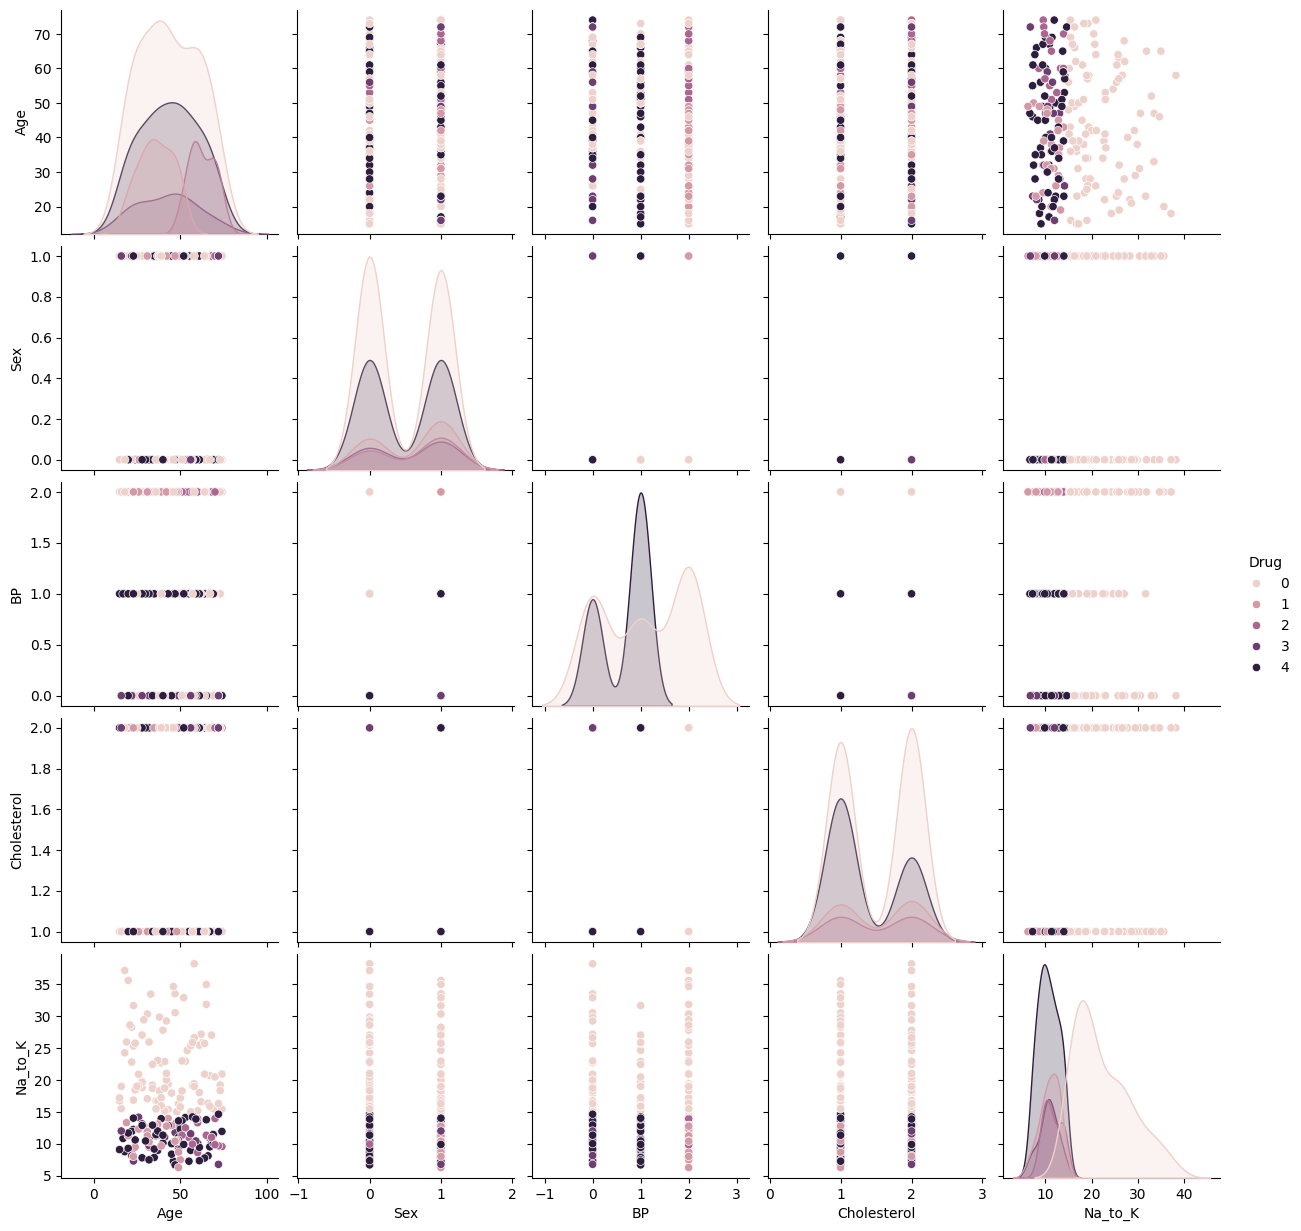

In [22]:
sns.pairplot(df[:], diag_kind='kde', hue='Drug')

In [23]:
print(df['Drug'].value_counts())

0    91
4    54
1    23
3    16
2    16
Name: Drug, dtype: int64


In [81]:
from tensorflow.keras.utils import to_categorical
y_data=df['Drug']
y_data=to_categorical(y_data)
y_data

array([[1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0.

In [82]:
df[df.columns[:-1]]

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0.0,2.0,2.0,25.355
1,47,1.0,0.0,2.0,13.093
2,47,1.0,0.0,2.0,10.114
3,28,0.0,1.0,2.0,7.798
4,61,0.0,0.0,2.0,18.043
...,...,...,...,...,...
195,56,0.0,0.0,2.0,11.567
196,16,1.0,0.0,2.0,12.006
197,52,1.0,1.0,2.0,9.894
198,23,1.0,1.0,1.0,14.020


In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[df.columns[:-1]], y_data, test_size=0.2)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)


In [84]:
print(X_train.shape)
print(X_test.shape)

(128, 5)
(40, 5)


In [85]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

std_value=std.fit(X_train)

import pickle
with open("std.pkl", "wb") as p:
    pickle.dump(std_value,p)
    




In [86]:
X_train

,Age,Sex,BP,Cholesterol,Na_to_K
124,53,0.0,2.0,1.0,12.495
91,41,1.0,2.0,1.0,15.156
111,47,0.0,1.0,1.0,6.683
20,57,1.0,0.0,1.0,19.128
12,43,1.0,0.0,2.0,15.376
...,...,...,...,...,...
106,22,1.0,1.0,2.0,11.953
99,15,0.0,2.0,1.0,16.725
115,51,1.0,2.0,2.0,18.295
26,31,1.0,2.0,2.0,30.366


In [87]:
X_train=std_value.transform(X_train)
X_val=std_value.transform(X_val)

In [88]:
X_train

array([[ 6.15560329e-01, -1.01574900e+00,  1.11130838e+00,
        -9.84495185e-01, -5.24664584e-01],
       [-1.12868535e-01,  9.84495185e-01,  1.11130838e+00,
        -9.84495185e-01, -1.60046169e-01],
       [ 2.51345897e-01, -1.01574900e+00, -6.42905677e-02,
        -9.84495185e-01, -1.32104272e+00],
       [ 8.58369950e-01,  9.84495185e-01, -1.23988952e+00,
        -9.84495185e-01,  3.84209504e-01],
       [ 8.53627575e-03,  9.84495185e-01, -1.23988952e+00,
         1.01574900e+00, -1.29901091e-01],
       [-1.12868535e-01, -1.01574900e+00, -1.23988952e+00,
        -9.84495185e-01,  3.30907526e-01],
       [ 1.89031084e+00,  9.84495185e-01,  1.11130838e+00,
        -9.84495185e-01, -1.21679706e-01],
       [-7.80594993e-01, -1.01574900e+00, -6.42905677e-02,
         1.01574900e+00, -8.05835944e-01],
       [ 1.76890603e+00,  9.84495185e-01, -1.23988952e+00,
         1.01574900e+00, -1.30925874e+00],
       [ 1.29941086e-01,  9.84495185e-01, -1.23988952e+00,
        -9.84495185e-01

In [89]:

batch_size=16


train_dataset = tf.data.Dataset.from_tensor_slices((X_train,y_train))
train_dataset = train_dataset.shuffle(buffer_size=len(X_train)).batch(batch_size)


val_dataset = tf.data.Dataset.from_tensor_slices((X_val,y_val))
val_dataset = val_dataset.shuffle(buffer_size=len(X_val)).batch(batch_size)







In [90]:
import tensorflow
from tensorflow.keras import Sequential

model = Sequential(
    layers=[tensorflow.keras.layers.InputLayer(input_shape=(5,)),
    tensorflow.keras.layers.Dense(128),
    tensorflow.keras.layers.Dropout(0.3),
    tensorflow.keras.layers.Dense(16),
    tensorflow.keras.layers.Dense(5, activation='softmax'),
    ]
)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [91]:
num_epochs = 30
for epoch in range(num_epochs):

    # Training loop
    for batch_x, batch_y in train_dataset:
        model.train_on_batch(batch_x, batch_y)

    # Validation loop
    for val_batch_x, val_batch_y in val_dataset:
        model.test_on_batch(val_batch_x, val_batch_y)
    
    # Optionally, print or log training/validation metrics
    train_loss, train_accuracy = model.evaluate(train_dataset, verbose=0)
    val_loss, val_accuracy = model.evaluate(val_dataset, verbose=0)
    print(f'Epoch {epoch + 1}/{num_epochs}, Training Loss: {train_loss:.4f}, Training Accuracy: {train_accuracy:.4f}, Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}')

Epoch 1/30, Training Loss: 1.4463, Training Accuracy: 0.3438, Validation Loss: 1.4139, Validation Accuracy: 0.2188
Epoch 2/30, Training Loss: 1.1918, Training Accuracy: 0.6016, Validation Loss: 1.1769, Validation Accuracy: 0.5938
Epoch 3/30, Training Loss: 1.0140, Training Accuracy: 0.7188, Validation Loss: 0.9965, Validation Accuracy: 0.7188
Epoch 4/30, Training Loss: 0.8910, Training Accuracy: 0.7734, Validation Loss: 0.8756, Validation Accuracy: 0.7812
Epoch 5/30, Training Loss: 0.7985, Training Accuracy: 0.7891, Validation Loss: 0.7830, Validation Accuracy: 0.8438
Epoch 6/30, Training Loss: 0.7260, Training Accuracy: 0.8047, Validation Loss: 0.7182, Validation Accuracy: 0.8438
Epoch 7/30, Training Loss: 0.6665, Training Accuracy: 0.8359, Validation Loss: 0.6756, Validation Accuracy: 0.8438
Epoch 8/30, Training Loss: 0.6156, Training Accuracy: 0.8438, Validation Loss: 0.6482, Validation Accuracy: 0.8438
Epoch 9/30, Training Loss: 0.5733, Training Accuracy: 0.8594, Validation Loss: 0

In [92]:
X_test

,Age,Sex,BP,Cholesterol,Na_to_K
179,67,0.0,1.0,2.0,15.891
40,73,0.0,1.0,2.0,19.221
33,65,0.0,2.0,1.0,31.876
150,49,1.0,2.0,1.0,8.700
194,46,0.0,2.0,2.0,34.686
199,40,0.0,0.0,1.0,11.349
197,52,1.0,1.0,2.0,9.894
148,61,0.0,0.0,1.0,7.340
7,41,1.0,0.0,2.0,11.037
165,38,1.0,0.0,2.0,18.295


In [93]:
with open("std.pkl", "rb") as p:
    std=pickle.load(p)

X_test=std.transform(X_test)

In [94]:
X_test

array([[ 1.465394  , -1.015749  , -0.06429057,  1.015749  , -0.05933421],
       [ 1.82960844, -1.015749  , -0.06429057,  1.015749  ,  0.39695265],
       [ 1.34398919, -1.015749  ,  1.11130838, -0.98449518,  2.13097973],
       [ 0.37275071,  0.98449518,  1.11130838, -0.98449518, -1.04466717],
       [ 0.19064349, -1.015749  ,  1.11130838,  1.015749  ,  2.51601458],
       [-0.17357094, -1.015749  , -1.23988952, -0.98449518, -0.68169303],
       [ 0.55485792,  0.98449518, -0.06429057,  1.015749  , -0.88106161],
       [ 1.10117957, -1.015749  , -1.23988952, -0.98449518, -1.23101856],
       [-0.11286853,  0.98449518, -1.23988952,  1.015749  , -0.72444423],
       [-0.29497575,  0.98449518, -1.23988952,  1.015749  ,  0.27006928],
       [ 1.28328679, -1.015749  , -1.23988952, -0.98449518,  1.29034313],
       [ 0.43345311,  0.98449518, -0.06429057, -0.98449518, -0.07317354],
       [ 0.43345311, -1.015749  , -0.06429057, -0.98449518,  0.12153626],
       [ 1.89031084,  0.98449518, -1.2

In [101]:

import numpy as np

# test_dataset = tf.data.Dataset.from_tensor_slices((X_test,y_test))
# test_dataset = test_dataset.batch(batch_size)

# print(test_dataset)
#print(model.predict(X_test))
x=[]
for i in model.predict(X_test):
    x.append(np.argmax(i))

y=[]
for j in y_test:
    y.append(np.argmax(j))

# for x, y in test_dataset:
#     x=std.transform(x)
#     x_pred=model.predict(x)

#     print(x_pred)
    

1/2 [==============>...............] - ETA: 0s

2/2 [==============================] - 0s 7ms/step


In [105]:
from sklearn.metrics import precision_score

precision_score(x,y,average='weighted')

0.953125

In [77]:
with open("std.pkl", "rb") as f:
    std=pickle.load(f)

feature=std.feature_names_in_

x=[690,7.4,1.185,0.0,4.25,0.097,5.0,14.0,0.9966,3.63,0.54,10.7]

# dict={}
# if len(x)==12 and len(feature)==12:
#     for i in range(12):
#         dict[feature[i]]=x[i]

df_pred = pd.DataFrame(x).T
df_pred=std.transform(df_pred)

import numpy as np
print(df_pred)
print(model.predict(df_pred))
print(np.argmax(model.predict(df_pred)))



[[ 3.86100822e+02  3.85071909e+01  4.58207672e+00 -1.75524669e+00
   8.11565727e+01 -1.45525279e+00 -1.21880603e+00  6.93503587e+03
  -1.50518349e+01  1.78418628e+01 -9.22861135e+00  6.29099458e+00]]
1/1 [==============================] - 0s 45ms/step


/home/nileshdalagade/newenv/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


[[0. 0. 0. 0. 0. 0. 1. 0. 0.]]
1/1 [==============================] - 0s 37ms/step
6


In [51]:
pred=model.predict(df_pred)

pred[0,6]
                          

1/1 [==============================] - 0s 45ms/step


1.0